In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles


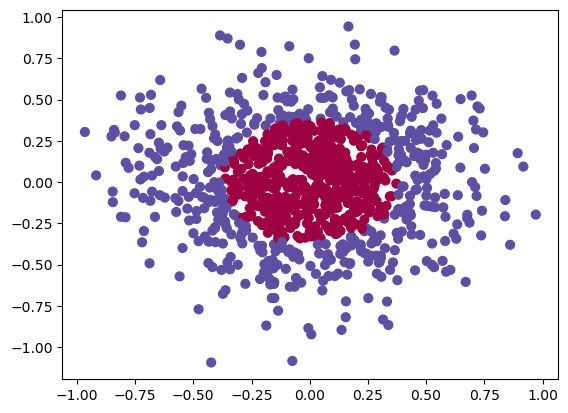

In [142]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples=N,
                                             n_features=2,
                                             n_classes=2, 
                                             shuffle=True,
                                             random_state=None)
X, Y = gaussian_quantiles
Y = Y[:,np.newaxis]
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral);

In [150]:
# función de activación
def sigmoid(x,derivative=False): 
    if derivative:
        return np.exp(-x)/((1+np.exp(-x))**2)
    else:
        return 1/(1+np.exp(-x))

# función de activación relu
def relu(x,derivative=False):
    if derivative:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:
        return np.maximum(0,x)
    
# función de coste mse
def mse(y, y_hat,derivative=False): 
    if derivative:
        return (y_hat - y)
    else:
        return np.mean(np.power(y_hat - y, 2))



In [144]:
# Inicialización de los hiperparámetros
def inicialize_parametres(layers_dims):
    parameters = {}
    L = len(layers_dims) # number of layers in the network
    for l in range(0,L-1): # weights initialization
        parameters['W' + str(l+1)] = (np.random.randn(layers_dims[l], layers_dims[l+1])*2 - 1)
        parameters['b' + str(l+1)] = (np.random.randn(1,layers_dims[l+1])*2 -1)
        
    return parameters

In [171]:
capas = [2,3,2,1]
params = inicialize_parametres(capas)



In [172]:
def train(x_data,learning_rate,params,training=True):
    learning_rate = learning_rate
    # Forward propagation
    params['A0'] = x_data

    params['Z1'] = np.dot(params['A0'], params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
   

    params['Z2'] = np.dot(params['A1'], params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])

    params['Z3'] = np.dot(params['A2'], params['W3']) + params['b3']
    params['A3'] = relu(params['Z3'])
    
    output = params['A3']

    if training:
        # Backward propagation
        # dz3 is the derivative of the cost function with respect to z3 and z3 is the input of the activation function of the output layer
        # paramas['A3'] shape is (1000,1) and Y shape is (1000,1) so dz3 shape is (1000,1)
        # params['dZ3'] shape is (1000,1)
        # params['A2'] shape is (1000,2) and params['dZ3'] shape is (1000,1) so params['dW3'] shape is (2,1) 
        # params['A2'].T shape is (2,1000) 
        # params['dW3'] shape is (2,1)

        params['dZ3'] = mse(Y, output, derivative=True) * sigmoid(params['Z3'], derivative=True)
        params['dW3'] = np.dot(params['A2'].T, params['dZ3']) 

        # params['dZ3'] shape is (1000,1) 
        # params['W3'].T shape is (1,2)
        # params['dZ2'] shape is (1000,2)
        params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['Z2'], derivative=True)
        params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

        params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['Z1'], derivative=True)
        params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])
        
        # Gradient descent
        
        params['W3'] = params['W3'] - learning_rate * params['dW3']
        params['b3'] = params['b3'] - learning_rate * np.mean(params['dZ3'], axis=0, keepdims=True)

        params['W2'] = params['W2'] - learning_rate * params['dW2']
        params['b2'] = params['b2'] - learning_rate * np.mean(params['dZ2'], axis=0, keepdims=True)

        params['W1'] = params['W1'] - learning_rate * params['dW1']
        params['b1'] = params['b1'] - learning_rate * np.mean(params['dZ1'], axis=0, keepdims=True) 
    return params


1.4779326857210786
1.4440870145816622
1.4108424216647981
1.3782010389503432
1.3461645556542399
1.314734214145514
1.2839108069887764
1.2536946751348046
1.2240857072757159
1.1950833403750603
1.1666865613767676
1.1388939100904185
1.1117034832438308
1.0851129396874948
1.0591195067289951
1.0337199875693661
1.0089107698073303
0.984687834971591
0.9610467690359887
0.9379827738672477
0.9154906795504322
0.8935649575330424
0.8721997345249983
0.8513888070885879
0.8311256568498061
0.8114034662604384
0.7922151348386791
0.7735532958151278
0.7554103331105573
0.7377783985719593
0.7206494293940077
0.7040151656542205
0.6878671678916641
0.6721968346611265
0.6569954199970842
0.6422540507246166
0.6279637435575257
0.6141154219273487
0.6006999324905687
0.5877080612651862
0.575130549351788
0.5629581081983538
0.5511814343722015
0.5397912238066576
0.5287781854942305
0.5181330546021902
0.5078466049905346
0.49790966111625906
0.48831310931169447
0.4790479084283428
0.47010509984113663
0.46147581681137284
0.453151293

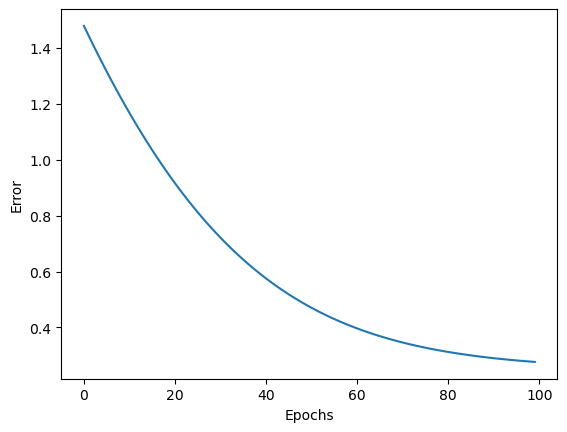

In [177]:
capas = [2,3,2,1]
params = inicialize_parametres(capas)
error = []
for i in range(1000):
    output = train(X,0.01,params)
    if i % 10 == 0:
        error.append(mse(Y,output['A3']))
        print(mse(Y,output['A3']))
        
# Plot the error over the entire training duration
plt.plot(error)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [180]:
import numpy as np

x = np.array([[45,23,673],
             [454,233,40]])
print(x.ndim)


2
